In [33]:
%run init.ipynb

### Notas de aula de Computação Quântica <br> Autor: Jonas Maziero

# Kraus' representation
For an initial state $\rho_{0}^{S}\otimes|0\rangle_{A}\langle 0|$ for system + ancilla and a unitary evolution $U_{SA}$, one can obtain the operator sum representation (https://arxiv.org/abs/1510.09081):
\begin{align}
\rho^{S} &= Tr_{A}(U_{SA}\rho_{0}^{S}\otimes|0\rangle_{A}\langle 0|U_{SA}^{\dagger}) = \sum_{k}E_{k}\rho_{0}^{S}E_{k}^{\dagger},
\end{align}
where $E_{k}$ are the Kraus' operators with ${}_{S}\langle m|E_{k}|n\rangle_{S}={}_{S}\langle m|\otimes{}_{A}\langle k|U_{SA}|n\rangle_{S}\otimes|0\rangle_{A}.$ Besides, this representation can be obtained from the unitary mapping $$U_{SA}|\psi\rangle_{S}\otimes|0\rangle_{A} = \sum_{k}E_{k}|\psi\rangle_{S}\otimes|k\rangle_{A}.$$

## Simulation of quantum channels with a QC
Following (http://arxiv.org/abs/1704.05593), let's start from an initial state $$|\Psi_{0}\rangle_{SA}=|\psi\rangle_{S}\otimes|0\rangle_{A},$$ and apply the following sequence of operations:
1. A unitary operation $V$ on the ancillas:
\begin{align}
|\Psi_{1}\rangle_{SA} &= \mathbb{I}_{S}\otimes V_{A}|\psi\rangle_{S}\otimes|0\rangle_{A} = |\psi\rangle_{S}\otimes V_{A}|0\rangle_{A} = |\psi\rangle_{S}\otimes|C_{0}^{V_{A}}\rangle_{A}\\
&= |\psi\rangle_{S}\otimes \sum_{j=0}^{d-1}V_{j,0}^{A}|j\rangle_{A} = \sum_{j=0}^{d-1}V_{j,0}^{A}|\psi\rangle_{S}\otimes|j\rangle_{A},
\end{align}
with $d=2^{n}$. Above we used 
$$(V_{A}|0\rangle_{A})_{j}=\sum_{k=0}^{d-1}V^{A}_{j,k}|0\rangle_{A})_{k}=\sum_{k=0}^{d-1}V^{A}_{j,k}\delta_{0,k}=V^{A}_{j,0}.$$ 
We use the notation $|C_{j}^{M}\rangle$ for the $j$-th column vector of a matrix $M$.

2. A controlled unitary operation 
$$U_{c} = \sum_{j=0}^{d-1}U_{j}^{S}\otimes|j\rangle_{A}\langle j|:$$
such that
\begin{align}
|\Psi_{2}\rangle_{SA} &= U_{c}\sum_{j=0}^{d-1}V_{j,0}^{A}|\psi\rangle_{S}\otimes|j\rangle_{A} = \sum_{k=0}^{d-1}U_{k}^{S}\otimes|k\rangle_{A}\langle k|\sum_{j=0}^{d-1}V_{j,0}^{A}|\psi\rangle_{S}\otimes|j\rangle_{A} \\
& = \sum_{k=0}^{d-1}\sum_{j=0}^{d-1}V_{j,0}^{A}U_{k}^{S}|\psi\rangle_{S}\otimes|k\rangle_{A}\langle k|j\rangle_{A} = \sum_{j=0}^{d-1}V_{j,0}^{A}U_{j}^{S}|\psi\rangle_{S}\otimes|j\rangle_{A}.
\end{align}
Remark. If all Kraus' operator of a given quantum operation are unitary, then we can stop here.

3. A unitary on the ancillas:
\begin{align}
|\Psi_{2}\rangle_{SA} &= \mathbb{I}_{S}\otimes W_{A}|\Psi_{2}\rangle_{SA} = \sum_{j=0}^{d-1}V_{j,0}^{A}U_{j}^{S}|\psi\rangle_{S}\otimes W_{A}|j\rangle_{A} = \sum_{j=0}^{d-1}V_{j,0}^{A}U_{j}^{S}|\psi\rangle_{S}\otimes |C_{j}^{W_{A}}\rangle_{A} \\
& = \sum_{j=0}^{d-1}V_{j,0}^{A}U_{j}^{S}|\psi\rangle_{S}\otimes \sum_{k=0}^{d-1}W_{k,j}^{A}|k\rangle_{A} = \sum_{k=0}^{d-1}\left(\sum_{j=0}^{d-1}W_{k,j}^{A}V_{j,0}^{A}U_{j}^{S}\right)|\psi\rangle_{S}\otimes |k\rangle_{A} \\
& =: \sum_{k=0}^{d-1}E_{k}^{S}|\psi\rangle_{S}\otimes |k\rangle_{A}.
\end{align}
Above we used 
$$(W_{A}|j\rangle_{A})_{k} = \sum_{l=0}^{d-1}W^{A}_{k,l}(|j\rangle_{A})_{l}= \sum_{l=0}^{d-1}W^{A}_{k,l}\delta_{j,l} = W^{A}_{k,j}.$$
We also defined the Kraus' operators as linear combinations of the unitary operator $U_{j}^{S}$: $$E_{k}^{S} := \sum_{j=0}^{d-1}W_{k,j}^{A}V_{j,0}^{A}U_{j}^{S}.$$

OBS: For this protocol to be valid in general, the unitary opeators $U_{j}^{S}$ appearing in $U_{c}$ must form a __basis__ for the matrix space where $E_{k}$ are defined. If the system $\mathcal{H}_{S}$ has dimension $d_{S}$, then there is $d_{S}^{2}$ basis elements $U_{j}$, i.e., $j=0,\cdots,d_{S}^{2}-1$, and therefore $$d=d_{S}^{2}.$$

Let's verify that the evolution above indeed gives the Kraus' operator sum representation:
\begin{align}
\rho^{S}_{2} &= Tr_{A}|\Psi_{2}\rangle_{SA}\langle\Psi_{2}| = Tr_{A}\sum_{k=0}^{d-1}E_{k}^{S}|\psi\rangle_{S}\otimes |k\rangle_{A}\sum_{l=0}^{d-1}\langle\psi|_{S}(E_{l}^{S})^{\dagger}\otimes \langle l|_{A} \\
& = Tr_{A}\sum_{k,l=0}^{d-1}E_{k}^{S}|\psi\rangle_{S}\langle\psi|(E_{l}^{S})^{\dagger}\otimes |k\rangle_{A}\langle l| = \sum_{k,l=0}^{d-1}E_{k}^{S}|\psi\rangle_{S}\langle\psi|(E_{l}^{S})^{\dagger}\otimes \delta_{l,k} \\
& = \sum_{k=0}^{d-1}E_{k}^{S}|\psi\rangle_{S}\langle\psi|(E_{k}^{S})^{\dagger}.
\end{align}

OBS: By the linearity of these operations, this results is generalized for any initial state $\rho_{0}^{S}=\sum_{j}p_{j}|\psi_{j}\rangle_{S}\langle\psi_{j}|$ for $\{p_{j}\}$ a probability distribution.

This protocol is illustrated in the figure below.
<img src="fig_channel_sim.png" width="600">

The trace-preserving property follows from:
\begin{align}
\sum_{k=0}^{d-1}(E_{k}^{S})^{\dagger}E_{k}^{S} &= \sum_{k=0}^{d-1}\sum_{j=0}^{d-1}(W_{k,j}^{A}V_{j,0}^{A}U_{j}^{S})^{\dagger}\sum_{l=0}^{d-1}W_{k,l}^{A}V_{j,0}^{A}U_{l}^{S} = \sum_{j,l=0}^{d-1}\sum_{k=0}^{d-1}(W_{k,j}^{A})^{*}W_{k,l}^{A}V_{j,0}^{A}(V_{j,0}^{A})^{*}(U_{j}^{S})^{\dagger}U_{l}^{S} \\
& = \sum_{j,l=0}^{d-1}\sum_{k=0}^{d-1}(W^{\dagger}_{A})_{j,k}W_{k,l}^{A}V_{j,0}^{A}(V_{j,0}^{A})^{*}(U_{j}^{S})^{\dagger}U_{l}^{S} = \sum_{j,l=0}^{d-1}(W^{\dagger}_{A}W_{A})_{j,l}(V_{j,0}^{A})^{*}V_{j,0}^{A}(U_{j}^{S})^{\dagger}U_{l}^{S} \\
& = \sum_{j,l=0}^{d-1}\delta_{j,l}V_{j,0}^{A}(V_{j,0}^{A})^{*}(U_{j}^{S})^{\dagger}U_{l}^{S}  = \sum_{j=0}^{d-1}(V^{\dagger}_{A})_{0,j}V_{j,0}^{A}(U_{j}^{S})^{\dagger}U_{j}^{S} = \sum_{j=0}^{d-1}(V^{\dagger}_{A})_{0,j}V_{j,0}^{A}\mathbb{I}_{S} \\
& = (V^{\dagger}_{A}V_{A})_{0,0}\mathbb{I}_{S} = \mathbb{I}_{S}.
\end{align}

OBS: We observe also that for an orthonormal basis of matrices $B_{j}$ we can write any matrix as $$A=\sum_{j}c_{j}B_{j}$$ with $$c_{j}=\langle B_{j}|A\rangle_{HS}=Tr(B_{j}^{\dagger}A).$$

OBS: To see that $U_{c} = \sum_{j=0}^{d-1}U_{j}^{S}\otimes|j\rangle_{A}\langle j|$ can ideed be implemented as shown in the figure, let's consider the case $d=2$. In this case
$$C_{U_{0}} = |0\rangle\langle 0|\otimes U_{0} + |1\rangle\langle 1|\otimes I$$
and 
$$C_{U_{1}} = |0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U_{1}$$
such that
\begin{align}
& C_{U_{0}}C_{U_{1}} = (|0\rangle\langle 0|\otimes U_{0} + |1\rangle\langle 1|\otimes I)(|0\rangle\langle 0|\otimes I + |1\rangle\langle 1|\otimes U_{1}) \\
& = |0\rangle\langle 0|\otimes U_{0}+0+0+|1\rangle\langle 1|\otimes U_{1} = U_{c}.
\end{align}

### Example: Phase damping
The Kraus' operators for this channel can be written as 
$$E_{0} = \begin{bmatrix}1&0\\0&\sqrt{1-\lambda}\end{bmatrix},\ E_{1} = \begin{bmatrix}0&0\\0&\sqrt{\lambda}\end{bmatrix}$$ 
with $\lambda\in[0,1].$ For a qubit, we shall use the Pauli matrices to form an orthonormal basis (that are unitary and hermitian): $$\left\{\frac{\sigma_{0}}{\sqrt{2}},\frac{\sigma_{1}}{\sqrt{2}},\frac{\sigma_{2}}{\sqrt{2}},\frac{\sigma_{3}}{\sqrt{2}}\right\}.$$ 

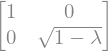

In [2]:
lbda = symbols('lambda', real=True); E0 = Matrix([[1,0],[0,sqrt(1-lbda)]]); E0

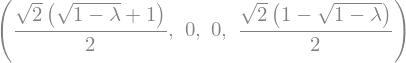

In [3]:
# coefficients of the expansion of E0 in the Pauli basis
c0 = trace((id(2)/sqrt(2))*E0); c1 = trace((pauli(1)/sqrt(2))*E0)
c2 = trace((pauli(2)/sqrt(2))*E0); c3 = trace((pauli(3)/sqrt(2))*E0)
simplify(c0), simplify(c1), simplify(c2), simplify(c3)

So, we have 
\begin{align}
E_{0} &= c_{0}\frac{\sigma_{0}}{\sqrt{2}} + c_{1}\frac{\sigma_{1}}{\sqrt{2}} + c_{2}\frac{\sigma_{2}}{\sqrt{2}} + c_{3}\frac{\sigma_{3}}{\sqrt{2}} \\
& = \frac{1+\sqrt{1-\lambda}}{\sqrt{2}}\frac{\sigma_{0}}{\sqrt{2}} + 0\frac{\sigma_{1}}{\sqrt{2}} + 0\frac{\sigma_{2}}{\sqrt{2}} + \frac{1-\sqrt{1-\lambda}}{\sqrt{2}}\frac{\sigma_{3}}{\sqrt{2}} \\
& = \frac{1+\sqrt{1-\lambda}}{2}\sigma_{0} + \frac{1-\sqrt{1-\lambda}}{2}\sigma_{3}.
\end{align}

From $E_{k}^{S} := \sum_{j=0}^{d-1}W_{k,j}^{A}V_{j,0}^{A}U_{j}^{S}$ we have 
\begin{align}
E_{0} &= \sum_{j=0}^{3}W_{0,j}^{A}V_{j,0}^{A}U_{j}^{S} = W_{0,0}^{A}V_{0,0}^{A}U_{0}^{S} + W_{0,1}^{A}V_{1,0}^{A}U_{1}^{S} + W_{0,2}^{A}V_{2,0}^{A}U_{2}^{S}+ W_{0,3}^{A}V_{3,0}^{A}U_{3}^{S} \\
&  = W_{0,0}^{A}V_{0,0}^{A}\sigma_{0} + W_{0,1}^{A}V_{1,0}^{A}\sigma_{1} + W_{0,2}^{A}V_{2,0}^{A}\sigma_{2}+ W_{0,3}^{A}V_{3,0}^{A}\sigma_{3}.
\end{align}
So, we can set
$$W_{0,0}^{A}=V_{0,0}^{A}=\sqrt{\frac{1+\sqrt{1-\lambda}}{2}}, \ W_{0,3}^{A}=V_{3,0}^{A}=\sqrt{\frac{1-\sqrt{1-\lambda}}{2}}.$$

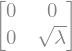

In [4]:
E1 = Matrix([[0,0],[0,sqrt(lbda)]]); E1

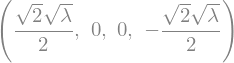

In [5]:
# coefficients for the expansion of E1 in the Pauli basis
c0 = trace((id(2)/sqrt(2))*E1); c1 = trace((pauli(1)/sqrt(2))*E1)
c2 = trace((pauli(2)/sqrt(2))*E1); c3 = trace((pauli(3)/sqrt(2))*E1)
simplify(c0), simplify(c1), simplify(c2), simplify(c3)

So $$E_{1}= \frac{\sqrt{\lambda}}{2}\sigma_{0} - \frac{\sqrt{\lambda}}{2}\sigma_{3}.$$ As
\begin{align}
E_{1} & = W_{1,0}^{A}V_{0,0}^{A}\sigma_{0} + W_{1,1}^{A}V_{1,0}^{A}\sigma_{1} + W_{1,2}^{A}V_{2,0}^{A}\sigma_{2}+ W_{1,3}^{A}V_{3,0}^{A}\sigma_{3}
\end{align}
we see we can set
$$W_{1,0}^{A}=\sqrt{\frac{1-\sqrt{1-\lambda}}{2}}, \ W_{1,3}^{A}=\sqrt{\frac{1+\sqrt{1-\lambda}}{2}}.$$
With this, we get
\begin{align}
V_{A} \doteq \begin{bmatrix} \sqrt{\frac{1+\sqrt{1-\lambda}}{2}} &0&0&\sqrt{\frac{1-\sqrt{1-\lambda}}{2}} \\ 0&1&0&0 \\ 0&0&1&0 \\ \sqrt{\frac{1-\sqrt{1-\lambda}}{2}} &0&0&-\sqrt{\frac{1+\sqrt{1-\lambda}}{2}}\end{bmatrix},\  W_{A} \doteq \begin{bmatrix} 0&1&0&0 \\ \sqrt{\frac{1-\sqrt{1-\lambda}}{2}} &0&0&\sqrt{\frac{1+\sqrt{1-\lambda}}{2}} \\ 0&0&1&0 \\ \sqrt{\frac{1+\sqrt{1-\lambda}}{2}}&0&0&-\sqrt{\frac{1-\sqrt{1-\lambda}}{2}}\end{bmatrix}.
\end{align}

Solving the system of nonlinear equations with Sympy
\begin{equation}
\begin{cases}
|V_{0,0}^{A}|^{2}+|V_{1,0}^{A}|^{2}+|V_{2,0}^{A}|^{2}+|V_{3,0}^{A}|^{2}=1, \\
|W_{0,0}^{A}|^{2}+|W_{0,1}^{A}|^{2}+|W_{0,2}^{A}|^{2}+|W_{0,3}^{A}|^{2}=1, \\
|W_{1,0}^{A}|^{2}+|W_{1,1}^{A}|^{2}+|W_{1,2}^{A}|^{2}+|W_{1,3}^{A}|^{2}=1, \\
(W_{1,0}^{A})^{*}W_{0,0}^{A}+(W_{1,1}^{A})^{*}W_{0,1}^{A}+(W_{1,2}^{A})^{*}W_{0,2}^{A}+(W_{1,3}^{A})^{*}W_{0,3}^{A}=0, \\
W_{0,0}^{A}V_{0,0}^{A} = \frac{1+\sqrt{1-\lambda}}{2}, \ W_{0,1}^{A}V_{1,0}^{A} = 0, \ W_{0,2}^{A}V_{2,0}^{A} = 0, \ W_{0,3}^{A}V_{3,0}^{A} = \frac{1-\sqrt{1-\lambda}}{2}, \\
W_{1,0}^{A}V_{0,0}^{A} = \frac{\sqrt{\lambda}}{2}, \ W_{1,1}^{A}V_{1,0}^{A} = 0, \ W_{1,2}^{A}V_{2,0}^{A} = 0, \ W_{1,3}^{A}V_{3,0}^{A} = -\frac{\sqrt{\lambda}}{2}.
\end{cases}
\end{equation}

In [6]:
V00,V10,V20,V30,W00,W01,W02,W03,W10,W11,W12,W13=symbols('V00 V10 V20 V30 W00 W01 W02 W03 W10 W11 W12 W13',real=True)
#nonlinsolve([V00**2+V10**2+V20**2+V30**2-1, W00**2+W01**2+W02**2+W03**2-1,
#             W10**2+W11**2+W12**2+W13**2-1,W10*W00+W11*W01+W12*W02+W13*W03,
#             W00*V00-(1+sqrt(1-lbda))/2, W01*V10, W02*V20, W03*V30-(1-sqrt(1-lbda))/2,
#             W10*V00-sqrt(lbda)/2, W11*V10, W12*V20, W13*V30+sqrt(lbda)/2],
#            [V00,V10,V20,V30,W00,W01,W02,W03,W10,W11,W12,W13])
# took too long for solving (did not return any result)

#### Verifications

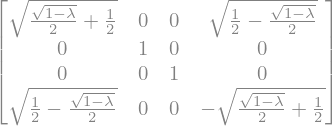

In [7]:
V = Matrix([[sqrt((1+sqrt(1-lbda))/2),0,0,sqrt((1-sqrt(1-lbda))/2)],[0,1,0,0],[0,0,1,0],
            [sqrt((1-sqrt(1-lbda))/2),0,0,-sqrt((1+sqrt(1-lbda))/2)]])
V

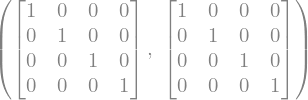

In [8]:
V*V.T, V.T*V # verification of unitarity

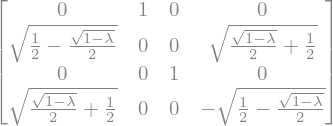

In [9]:
W = Matrix([[0,1,0,0],[sqrt((1-sqrt(1-lbda))/2),0,0,sqrt((1+sqrt(1-lbda))/2)],[0,0,1,0],
            [sqrt((1+sqrt(1-lbda))/2),0,0,-sqrt((1-sqrt(1-lbda))/2)]])
W

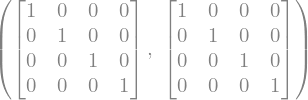

In [10]:
W*W.T, W.T*W # verification of unitarity

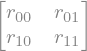

In [11]:
r00,r01,r10,r11 = symbols('r00,r01,r10,r11',real=True)
rhoS0 = Matrix([[r00,r01],[r10,r11]])
rhoS0 # initial state

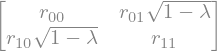

In [12]:
rhoS = E0*rhoS0*E0 + E1*rhoS0*E1; simplify(rhoS) # evolved state using the Kraus' operators

In [13]:
# Outside these functions, initialize: rhos = zeros(ds,ds), s=A,B
def ptraceA(da, db, rho):
    rhoB = zeros(db,db)
    for j in range(0, db):
        for k in range(0, db):
            for l in range(0, da):
                rhoB[j,k] += rho[l*db+j,l*db+k]
    return rhoB

def ptraceB(da, db, rho):
    rhoA = zeros(da,da)
    for j in range(0, da):
        for k in range(0, da):
            for l in range(0, db):
                rhoA[j,k] += rho[j*db+l,k*db+l]
    return rhoA

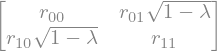

In [16]:
# tests the circuit for the PDC
rhoSA0 = tp(rhoS0,proj(cb(4,0)))#; rhoSA0 
rhoSA1 = tp(id(2),V)*rhoSA0*tp(id(2),V.T)#; rhoSA1
Uc = tp(id(2),proj(cb(4,0))) + tp(id(2),proj(cb(4,1))) + tp(id(2),proj(cb(4,2))) + tp(pauli(3),proj(cb(4,3)))
#Uc*Uc.T, Uc.T*Uc
rhoSA2 = Uc*rhoSA1*Uc.T; #rhoSA2
rhoSA3 = tp(id(2),W)*rhoSA2*tp(id(2),W.T) # Não precisava pois só mudará a base de A
rhoS = ptraceB(2, 4, rhoSA3); simplify(rhoS) # ok!

#### Alternative: 2-dimensional ancilla
In (http://arxiv.org/abs/1704.05593), instead of the unitary operators above, the authors used
\begin{align}
V_{A} = W_{A} = \begin{bmatrix} \sqrt{\frac{1+\sqrt{1-\lambda}}{2}} &\sqrt{\frac{1-\sqrt{1-\lambda}}{2}}  \\ \sqrt{\frac{1-\sqrt{1-\lambda}}{2}}&-\sqrt{\frac{1+\sqrt{1-\lambda}}{2}}\end{bmatrix}.
\end{align}
Let's verify if it works.

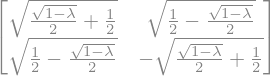

In [17]:
V = Matrix([[sqrt((1+sqrt(1-lbda))/2),sqrt((1-sqrt(1-lbda))/2)],
            [sqrt((1-sqrt(1-lbda))/2),-sqrt((1+sqrt(1-lbda))/2)]])
W = V; V

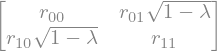

In [18]:
# tests the (http://arxiv.org/abs/1704.05593) circuit
rhoSA0 = tp(rhoS0,proj(cb(2,0))); rhoSA0 
rhoSA1 = tp(id(2),V)*rhoSA0*tp(id(2),V.T); rhoSA1
Uc = tp(id(2),proj(cb(2,0))) + tp(pauli(3),proj(cb(2,1))); Uc, Uc*Uc.T, Uc.T*Uc
rhoSA2 = Uc*rhoSA1*Uc.T; rhoSA2
rhoSA3 = tp(id(2),W)*rhoSA2*tp(id(2),W.T)
rhoS = ptraceB(2, 2, rhoSA3); simplify(rhoS) # also works!

## Sobre a implementação do phase damping no IBMQ
If we set 
$$V_{A} = W_{A} = \begin{bmatrix} \sqrt{\frac{1+\sqrt{1-\lambda}}{2}} &\sqrt{\frac{1-\sqrt{1-\lambda}}{2}}  \\ \sqrt{\frac{1-\sqrt{1-\lambda}}{2}}&-\sqrt{\frac{1+\sqrt{1-\lambda}}{2}}\end{bmatrix}:=U_{3}(\theta,\phi,\xi) = \begin{bmatrix}\cos(\theta/2) & -e^{i\xi}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\xi)}\cos(\theta/2) \end{bmatrix},$$
we must have
\begin{align}
& \theta = 2\arccos\sqrt{\frac{1+\sqrt{1-\lambda}}{2}} = 2\arcsin\sqrt{\frac{1-\sqrt{1-\lambda}}{2}}, \\
& \phi = 0, \\
& \xi = \pi.
\end{align}

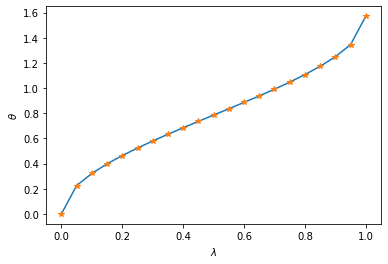

In [21]:
lb = np.arange(0,1.05,0.05); th = 2*np.arccos(np.sqrt((1+np.sqrt(1-lb))/2))
th_ = 2*np.arcsin(np.sqrt((1-np.sqrt(1-lb))/2))
plt.plot(lb,th); plt.plot(lb, th_, '*') 
plt.xlabel(r'$\lambda$'); plt.ylabel(r'$\theta$'); plt.show()

In [23]:
# phase damping channel, exact
def phase_damping(rho, lb):
    E0 = Matrix([[1,0],[0,sqrt(1-lb)]]); E1 = Matrix([[0,0],[0,sqrt(lb)]])
    return E0*rho*E0 + E1*rho*E1

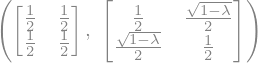

In [24]:
lb = symbols('lambda')
psi = (cb(2,0)+cb(2,1))/sqrt(2); rho = proj(psi); rhopd = phase_damping(rho, lb)
rho, rhopd

In [25]:
def coh_l1(rho):
    d = rho.shape[0]; C = 0
    for j in range(0, d-1):
        for k in range(j+1, d):
            C += abs(rho[j,k])
    return 2*C

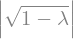

In [26]:
coh = coh_l1(rhopd); coh

In [34]:
# simulation
from qiskit import *

In [35]:
def state_prep():
    qr = QuantumRegister(1); qc = QuantumCircuit(qr, name = 'state_prep')
    qc.h(qr[0])
    return qc
qc_sp = state_prep(); qc_sp.draw()

┌───┐
q3_0: ┤ H ├
      └───┘

In [36]:
def qc_sim_pd(lb):
    qr = QuantumRegister(2); qc = QuantumCircuit(qr, name = 'pd_sim')
    th = 2*math.acos(math.sqrt((1+math.sqrt(1-lb))/2))
    qc.u(th, 0, math.pi, qr[1]); qc.cz(qr[1],qr[0]); qc.u(th, 0, math.pi, qr[1])
    return qc
lb = 0.5; qc_pd = qc_sim_pd(lb); qc_pd.draw()

q4_0: ───────────────■───────────────
      ┌────────────┐ │ ┌────────────┐
q4_1: ┤ U(π/4,0,π) ├─■─┤ U(π/4,0,π) ├
      └────────────┘   └────────────┘

In [37]:
qr = QuantumRegister(2); qc = QuantumCircuit(qr)
qc_sp = state_prep(); qc.append(qc_sp, [qr[0]]); qc.barrier()
lb = 0; qc_pd = qc_sim_pd(lb); qc.append(qc_pd, [qr[0],qr[1]]); qc.barrier()
qc.draw()

┌────────────┐ ░ ┌─────────┐ ░ 
q5_0: ┤ state_prep ├─░─┤0        ├─░─
      └────────────┘ ░ │  pd_sim │ ░ 
q5_1: ───────────────░─┤1        ├─░─
                     ░ └─────────┘ ░

In [83]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
nshots = 8192
qiskit.IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_belem')
from qiskit.tools.monitor import job_monitor

ibmqfactory.load_account:WARNING:2021-11-24 15:56:57,311: Credentials are already in use. The existing account in the session will be replaced.


In [84]:
lb = np.arange(0,1.05,0.05); d = lb.shape[0]; Cteo = np.zeros(d); Csim = np.zeros(d); Cexp = np.zeros(d)
for j in range(0, d):
    Cteo[j] = np.abs(math.sqrt(1-lb[j])) # theoretical
    qr = QuantumRegister(2); qc = QuantumCircuit(qr)
    qc_sp = state_prep(); qc.append(qc_sp, [qr[0]]) # state preparation
    qc_pd = qc_sim_pd(lb[j]); qc.append(qc_pd, [qr[0],qr[1]]) # apply sim phase damping 
    qstc = state_tomography_circuits(qc, qr[0]) # circuit for state tomography
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots)
    qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
    Csim[j] = coh_l1(rho)
    # 1st I did the simulation, only afterwards I added the code for the experiments
    job = qiskit.execute(qstc, backend = device, shots = nshots)
    print(job.job_id()); job_monitor(job)
    qstf = StateTomographyFitter(job.result(), qstc); rho = qstf.fit(method='lstsq')
    Cexp[j] = coh_l1(rho)

619e8b078b720e600e1175fe
Job Status: job has successfully run
619e8b2a53ac6c207cd5b505
Job Status: job has successfully run
619e8b635297ba6976ece146
Job Status: job has successfully run
619e8b8d53ac6c1621d5b506
Job Status: job has successfully run
619e8bc81db79f02fada5587
Job Status: job has successfully run
619e8c1996d31930445237ac
Job Status: job has successfully run
619e8c3453ac6cbed5d5b509
Job Status: job has successfully run
619e8c6d96d31953475237af
Job Status: job has successfully run
619e8c9753ac6c1bf2d5b50c
Job Status: job has successfully run
619e8ceb8982d9b14b33a9d5
Job Status: job has successfully run
619e8d358982d92a1b33a9db
Job Status: job has successfully run
619e8d658b720e84bd11760b
Job Status: job has successfully run
619e8db9a6df2a0c9fb94faa
Job Status: job has successfully run
619e8e0996d319582c5237b7
Job Status: job has successfully run
619e8e60580e759df0150f74
Job Status: job has successfully run
619e8ea68b720e2c48117614
Job Status: job has successfully run
619e8f02

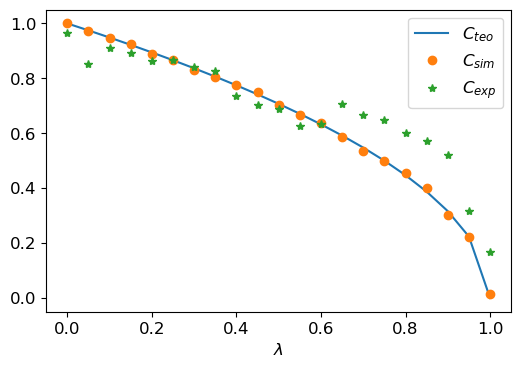

In [85]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(lb, Cteo, label = r'$C_{teo}$'); plt.plot(lb, Csim, 'o', label = r'$C_{sim}$')
plt.plot(lb, Cexp, '*', label = r'$C_{exp}$')
plt.legend(); plt.xlabel(r'$\lambda$'); plt.show()

## Exercise
Make the same kind of plot for the simulation of the amplitude damping channel. See http://arxiv.org/abs/1704.05593.

## Amplitude damping

In [1]:
2960/8

370.0

In [2]:
750/15

50.0